In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/50_Startups (1).csv")

In [3]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.describe()

,RND,ADMIN,MKT,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
RND       50 non-null float64
ADMIN     50 non-null float64
MKT       50 non-null float64
STATE     50 non-null object
PROFIT    50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# EDA for Regression

In [6]:
df.columns

Index(['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT'], dtype='object')

In [8]:
df.corr()

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


Text(0,0.5,'PROFIT')

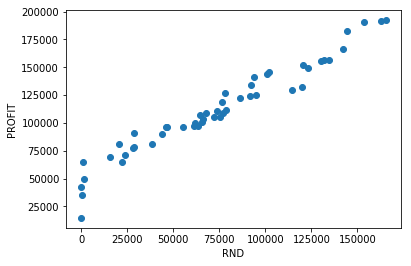

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df.RND, df.PROFIT)
plt.xlabel("RND")
plt.ylabel("PROFIT")

# Divide data in training and testing set

fitting --> X_train, y_train

predictions --> X_test

error --> y_test, pred

In [13]:
X = df[["RND"]]
y = df[["PROFIT"]]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training/Fitting the model

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [19]:
b0 = model.intercept_
b1 = model.coef_

# Make Predictions

In [20]:
pred = model.predict(X_test)

In [21]:
X_test

,RND
29,65605.48
31,61136.38
45,1000.23
13,91992.39
40,28754.33
11,100671.96
12,93863.75
1,162597.70
42,23640.93
24,77044.01


In [22]:
pred

array([[104035.8223524 ],
       [100195.24690384],
       [ 48516.51488607],
       [126711.73443967],
       [ 72367.33833077],
       [134170.62850022],
       [128319.91041949],
       [187387.26645364],
       [ 67973.07583975],
       [113865.66224982]])

In [23]:
T = pd.DataFrame(X_test)

In [24]:
T['actual_values_PROFIT'] = y_test

In [25]:
T['predicted_values_PROFIT'] = pred

In [26]:
T

,RND,actual_values_PROFIT,predicted_values_PROFIT
29,65605.48,101004.64,104035.822352
31,61136.38,97483.56,100195.246904
45,1000.23,64926.08,48516.514886
13,91992.39,134307.35,126711.734440
40,28754.33,78239.91,72367.338331
11,100671.96,144259.40,134170.628500
12,93863.75,141585.52,128319.910419
1,162597.70,191792.06,187387.266454
42,23640.93,71498.49,67973.075840
24,77044.01,108552.04,113865.662250


# Error --> (MSE, MAE, LOGERROR)

In [28]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, pred)
print("Overall model error is %.2f"%MAE)

Overall model error is 7221.88


# Plot Regression

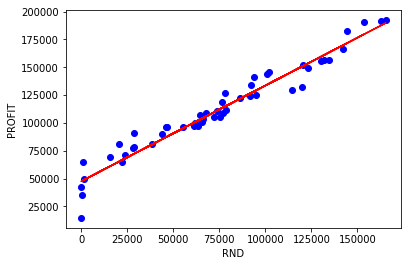

In [46]:
import matplotlib.pyplot as plt
plt.scatter(df.RND, df.PROFIT, c="blue")
# plt.scatter(X_train.RND, y_train.PROFIT, c="yellow")
plt.xlabel("RND")
plt.ylabel("PROFIT")
plt.plot(X_train, b0+b1*X_train, c="red")

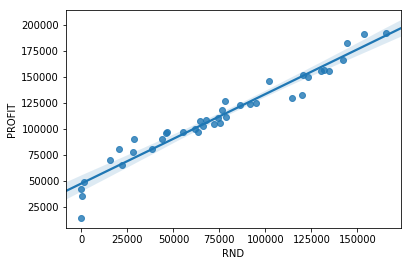

In [47]:
import seaborn as sb
sb.regplot(X_train.RND, y_train.PROFIT)

In [96]:
import pandas as pd
df_iris = pd.read_csv("C:/Users/Admin/Documents/Datasets/iris.csv")

In [97]:
df_iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [98]:
df_iris.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [99]:
df_iris.corr()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Unnamed: 0,1.000000,0.716676,-0.402301,0.882637,0.900027
Sepal.Length,0.716676,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.402301,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.882637,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.900027,0.817941,-0.366126,0.962865,1.000000


In [100]:
X_iris = df_iris[["Petal.Width"]]
y_iris = df_iris[["Petal.Length"]]

In [101]:
from sklearn.model_selection import train_test_split
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2)

In [102]:
from sklearn.linear_model import LinearRegression
lm_iris = LinearRegression()
model_iris = lm.fit(X_train_iris, y_train_iris)
b0_iris = model.intercept_
b1_iris = model.coef_

In [103]:
pred_iris = model.predict(X_test_iris)

In [104]:
temp = pd.DataFrame(X_test_iris)
temp["TRGT"] = y_test_iris
temp["PRED"] = pred_iris
temp

,Petal.Width,TRGT,PRED
119,1.5,5.0,4.478869
35,0.2,1.2,1.532765
138,1.8,4.8,5.158739
5,0.4,1.7,1.986012
148,2.3,5.4,6.291856
101,1.9,5.1,5.385363
59,1.4,3.9,4.252246
93,1.0,3.3,3.345752
137,1.8,5.5,5.158739
147,2.0,5.2,5.611986


In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_test_iris, pred_iris)
MAE = mean_absolute_error(y_test_iris, pred_iris)
print("Overall model error, MSE:", MSE) # ------ not to use here bcoz errors are b/w 0 and 1
print("Overall model error, MAE: %.2f"%MAE)

Overall model error, MSE: 0.234661223641114
Overall model error, MAE: 0.37


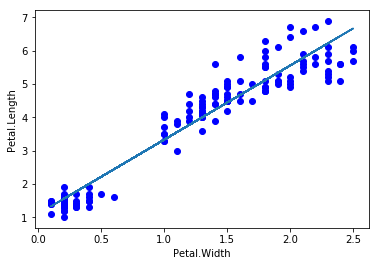

In [107]:
import matplotlib.pyplot as plt
plt.scatter(df_iris['Petal.Width'], df_iris['Petal.Length'], c="blue")
plt.xlabel("Petal.Width")
plt.ylabel("Petal.Length")
plt.plot(X_train_iris, b0+b1*X_train_iris)

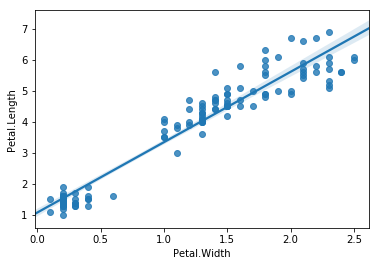

In [109]:
import seaborn as sb
sb.regplot(X_train_iris['Petal.Width'], y_train_iris['Petal.Length'])